<a href="https://colab.research.google.com/github/vedmara/Python-libraries-for-Data-Sience/blob/main/Stat_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACKGROUND: In a randomized control trial, 32 patients were divided into two groups: A and B. Group A received test drug whereas group B received placebo. The variable of interest was Numerical Pain Rating Scale (NPRS) before treatment and after 3 days of treatment. (Higher number indicates more pain)

QUESTIONS- 1. Import NPRS DATA and name it as pain_nprs. Find median NPRS before and after treatment.
2. Is post treatment NPRS score significantly less as compared to ‘before treatment’ NPRS score for Group A?
3. Is post treatment NPRS score significantly less as compared to ‘before treatment’ NPRS score for Group B?
4. Is the change in NPRS for group ‘A’ significantly different than group ‘B’? 5. Present change in NPRS for each group using box-whisker plot.


In [16]:
import pandas as pd
from scipy.stats import wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt
import os

In [17]:
pain_nprs=pd.read_csv('/content/drive/MyDrive/NPRS DATA.csv')

In [18]:
# 1. Find median NPRS before and after treatment.
median_before = pain_nprs['NPRS_before'].median()
median_after = pain_nprs['NPRS_after'].median()

print(f"Median NPRS before treatment: {median_before}")
print(f"Median NPRS after treatment: {median_after}")

Median NPRS before treatment: 7.0
Median NPRS after treatment: 5.0


In [19]:
# 2. Is post-treatment NPRS score significantly less for Group A?
group_a_before = pain_nprs[pain_nprs['Group'] == 'A']['NPRS_before']
group_a_after = pain_nprs[pain_nprs['Group'] == 'A']['NPRS_after']

_, p_value_group_a = wilcoxon(group_a_before, group_a_after)

print(f"P-value for Group A: {p_value_group_a}")

P-value for Group A: 0.009567852476852799


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [20]:
# 3. Is post-treatment NPRS score significantly less for Group B?
group_b_before = pain_nprs[pain_nprs['Group'] == 'B']['NPRS_before']
group_b_after = pain_nprs[pain_nprs['Group'] == 'B']['NPRS_after']

_, p_value_group_b = wilcoxon(group_b_before, group_b_after)

print(f"P-value for Group B: {p_value_group_b}")

P-value for Group B: 0.0005537177958275885


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [21]:
# 4. Is the change in NPRS for group ‘A’ significantly different than group ‘B’?
_, p_value_groups = mannwhitneyu(group_a_after - group_a_before, group_b_after - group_b_before)

print(f"P-value for the difference between Group A and Group B: {p_value_groups}")


P-value for the difference between Group A and Group B: 0.37803806569987897


<Figure size 800x600 with 0 Axes>

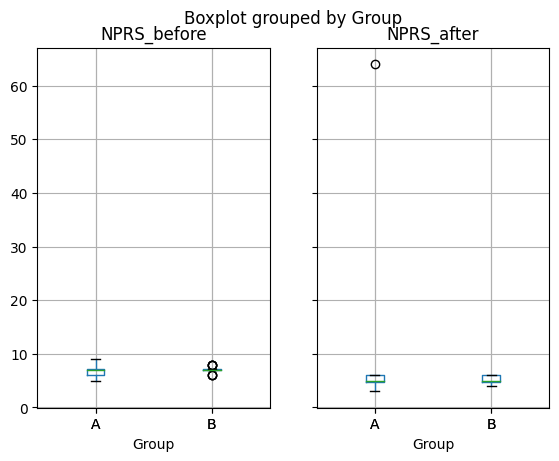

In [22]:
# 5. Present change in NPRS for each group using box-whisker plot.
plt.figure(figsize=(8, 6))
pain_nprs.boxplot(column=['NPRS_before', 'NPRS_after'], by='Group')
plt.show()

To determine whether the change in NPRS for Group A is significantly different from Group B, I use the p value obtained by the Mann-Whitney U test.
Null Hypothesis (H0): There is no difference in the change in NPRS scores between Group A and Group B.
Alternative Hypothesis (H1): There is a significant difference in the change in NPRS scores between Group A and Group B.
p-value = 0.378, indicating that there was no significant difference in the change in NPRS scores between the two groups.
We see that the box-and-whisker plot gives a visual representation of this data distribution.
I think it is necessary to increase the sample size in order to evaluate the effectiveness of the drug.